<a href="https://colab.research.google.com/github/adshyam/News-Fraud-Detection/blob/main/News_Fraud_Detection2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# News Fraud Detection

Dataset : https://www.kaggle.com/competitions/fake-news/data?select=train.csv

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data= pd.read_csv('/content/train.csv')
'''I shall train data that is given from on dataset located on the above link and shall use 
train-test split on train.csv data '''

'I shall train data that is given from on dataset located on the above link and shall use \ntrain-test split on train.csv data '

In [ ]:
data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
data.shape

(20800, 5)

In [ ]:
#Remove a dependent feature 
X =data.drop('label',axis=1)

In [ ]:
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [ ]:
# Get a dependent feature
y = data['label']

In [ ]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [ ]:
#Checking Null Values
data.isna().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [ ]:
#Drop the NaN Values
data = data.dropna()

In [ ]:
data.shape

(18285, 5)

In [ ]:
data.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [ ]:
messages = data.copy()

In [ ]:
# During dropping of NaN values, some of the index is also removed so, reset index is necessary
messages.reset_index(inplace=True)

In [ ]:
messages.head()

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


# Data Preprocessing 

In [ ]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords  #Removal of Stopwords
from nltk.stem.porter import PorterStemmer #Stemming Purpose
import re
ps = PorterStemmer()
lines = []
for i in range(0,len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    lines.append(review)


In [ ]:
lines[:5]  #view top 5

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri']

In [ ]:
# Applying CountVectorizer
# Creating Bag of Words Model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features =5000, ngram_range=(1,3))
X=cv.fit_transform(lines).toarray()

In [ ]:
# Independent features shape
X.shape

(18285, 5000)

In [ ]:
y = messages['label']

In [ ]:
# Dividing the dataset into Training & Testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33,random_state =0)

In [ ]:
cv.get_feature_names_out()[:10]  #View top 10 features names

array(['abandon', 'abc', 'abc news', 'abduct', 'abe', 'abedin', 'abl',
       'abort', 'abroad', 'absolut'], dtype=object)

In [ ]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [ ]:
# Create a DataFrame of X_train data
cv_data = pd.DataFrame(X_train, columns = cv.get_feature_names_out())


In [ ]:
cv_data.head()

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
"""References :  http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
                This function prints and plots the confusion matrix.
                Normalization can be applied by setting `normalize=True`.
                """

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
                          
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Prdicted label')
    

# Modeling 

We will develop Multinomial Naives Bayes, Binomial Naive Bayes and Bidirectional LSTM

1. Multinomial Naives Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

In [ ]:
from sklearn import metrics
import numpy as np
import itertools

accuracy : 0.902

Classification Report :
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      3389
           1       0.87      0.91      0.89      2646

    accuracy                           0.90      6035
   macro avg       0.90      0.90      0.90      6035
weighted avg       0.90      0.90      0.90      6035

Confusion matrix, without normalization


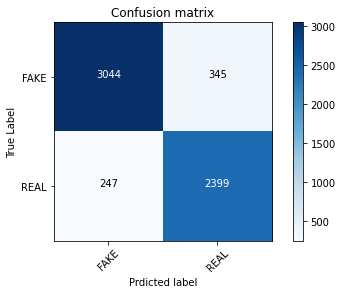

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
print('accuracy : %0.3f' %score)

print("\nClassification Report :")
print(classification_report(y_test, y_pred))

cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes = ['FAKE', 'REAL'])

5-fold cross-validation


In [ ]:
from sklearn.model_selection import GridSearchCV

n_classes= np.unique(y)
params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0],
          'fit_prior': [True, False],
          'class_prior': [None, [0.1,]* len(n_classes), ],
         }

multinomial_nb_grid = GridSearchCV(MultinomialNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5)
multinomial_nb_grid.fit(X_train,y_train)

print('Best Parameters : {}'.format(multinomial_nb_grid.best_params_))
print('Best Accuracy Through Grid Search : {:.3f}\n'.format(multinomial_nb_grid.best_score_))
     

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters : {'alpha': 0.5, 'class_prior': None, 'fit_prior': False}
Best Accuracy Through Grid Search : 0.900



Evaluate the performance of the Fine Tuned Model


Test Accuracy Score : 0.904

Classification Report after HyperParamter tuning:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      3389
           1       0.87      0.92      0.89      2646

    accuracy                           0.90      6035
   macro avg       0.90      0.91      0.90      6035
weighted avg       0.91      0.90      0.90      6035

Confusion Matrix created by using Multinomial Naive Bayes Algorithm after Hyperparameter Tuning
Confusion matrix, without normalization


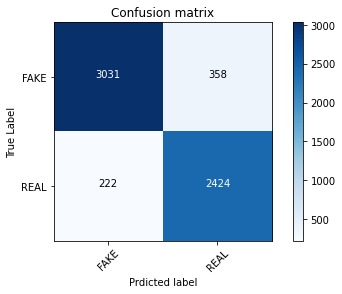

In [ ]:
y_preds = multinomial_nb_grid.best_estimator_.predict(X_test)

print("Test Accuracy Score : {:.3f}".format(accuracy_score(y_test, y_preds)))

print("\nClassification Report after HyperParamter tuning:")
print(classification_report(y_test, y_preds))

print('Confusion Matrix created by using Multinomial Naive Bayes Algorithm after Hyperparameter Tuning')
cm_tuned = metrics.confusion_matrix(y_test, y_preds)
plot_confusion_matrix(cm_tuned, classes = ['FAKE', 'REAL'])
     

#2. Bernoulli Naive Bayes


The accuracy score obtained from Bernoulli Naive Bayes is : 0.902
                                                                          

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.84      0.91      3389
           1       0.83      0.98      0.90      2646

    accuracy                           0.90      6035
   macro avg       0.91      0.91      0.90      6035
weighted avg       0.91      0.90      0.90      6035

Confusion Matrix created by using Bernoulli Naive Bayes Algorithm
Confusion matrix, without normalization


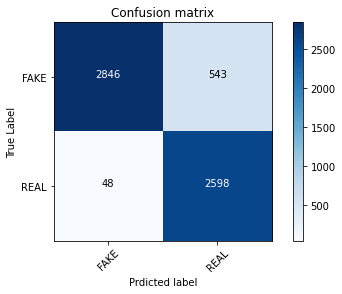

In [ ]:
from sklearn.naive_bayes import BernoulliNB
model_BNB= BernoulliNB() # define Bernoulli Naive Bayes Model
     
model_BNB.fit(X_train, y_train) # fit the data in the model
y_pred_B = model_BNB.predict(X_test) # predicted y values by Bernoulli model
score_BNB = metrics.accuracy_score(y_test, y_pred_B) # calculate the accuracy score of model
print('The accuracy score obtained from Bernoulli Naive Bayes is : %.3f' %score_BNB)
print('                                                                          ')

print("\nClassification Report")
print(classification_report(y_test, y_pred_B))

print('Confusion Matrix created by using Bernoulli Naive Bayes Algorithm')
cm_BNB = metrics.confusion_matrix(y_test, y_pred_B)
plot_confusion_matrix(cm_BNB, classes = ['FAKE', 'REAL'])

5-fold cross-validation for Bernoulli NB


In [ ]:
params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0],
          'fit_prior': [True, False],
          'class_prior': [None, [0.1,]* len(n_classes), ],
          'binarize': [None, 0.0, 8.5, 10.0]
         }

bernoulli_nb_grid = GridSearchCV(BernoulliNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5)
bernoulli_nb_grid.fit(X_train,y_train)

print('Best Parameters : {}'.format(bernoulli_nb_grid.best_params_))
print('Best Accuracy Through Grid Search : {:.3f}\n'.format(bernoulli_nb_grid.best_score_))
    

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best Parameters : {'alpha': 0.01, 'binarize': 0.0, 'class_prior': None, 'fit_prior': False}
Best Accuracy Through Grid Search : 0.702



Evaluate the performance of the Fine Tuned Model


Test Accuracy Score after Hyperparameter Tuning: 0.702

Classification Report after Hyperparameter Tuning:
              precision    recall  f1-score   support

           0       0.70      0.84      0.76      3419
           1       0.71      0.52      0.60      2616

    accuracy                           0.70      6035
   macro avg       0.71      0.68      0.68      6035
weighted avg       0.70      0.70      0.69      6035

Confusion Matrix created by using Bernoulli Naive Bayes Algorithm after Hyperparameter Tuning
Confusion matrix, without normalization


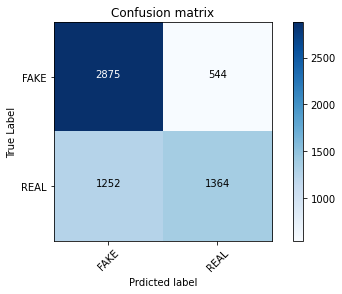

In [ ]:

from sklearn.metrics import classification_report, accuracy_score

y_pred_Bs = bernoulli_nb_grid.best_estimator_.predict(X_test)

print("Test Accuracy Score after Hyperparameter Tuning: {:.3f}".format(accuracy_score(y_test, y_pred_Bs)))

print("\nClassification Report after Hyperparameter Tuning:")
print(classification_report(y_test, y_pred_Bs))

print('Confusion Matrix created by using Bernoulli Naive Bayes Algorithm after Hyperparameter Tuning')
cm_BNB = metrics.confusion_matrix(y_test, y_pred_Bs)
plot_confusion_matrix(cm_BNB, classes = ['FAKE', 'REAL'])

In [ ]:
X_test.shape

(6035, 20)

In [ ]:
y_test.shape

(6035,)

In [ ]:
y_pred_Bs.shape

(6035,)

# 3. Bidirectional LSTM

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout

In [ ]:
lines[:5]

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri']

In [ ]:
voc_size = 5000  #Vocabulary size

onehot_rep = [one_hot(words, voc_size) for words in lines]
onehot_rep[:10]

[[3985, 2057, 4310, 4106, 1281, 1448, 1883, 43, 1070, 3959],
 [3197, 3308, 4478, 4198, 475, 3109, 894],
 [3818, 4977, 4890, 4969],
 [4287, 4206, 1846, 2800, 419, 1085],
 [2877, 475, 3703, 675, 1357, 4327, 475, 2458, 4819, 125],
 [4220,
  1129,
  599,
  3415,
  1873,
  3874,
  2172,
  3500,
  2269,
  1063,
  275,
  1528,
  2005,
  1956,
  894],
 [1572, 1252, 4362, 38, 4191, 628, 146, 728, 1249, 4178, 2067],
 [1698, 1988, 2988, 451, 3038, 4846, 3874, 119, 1249, 4178, 2067],
 [2533, 53, 4665, 4535, 1748, 2813, 2718, 113, 3874, 4865],
 [1509, 3849, 4698, 1327, 4174, 2283, 3378, 1994]]

# Embedidng Representation

In [ ]:
sent_length=20
embedded_docs=pad_sequences(onehot_rep,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ...   43 1070 3959]
 [   0    0    0 ...  475 3109  894]
 [   0    0    0 ... 4977 4890 4969]
 ...
 [   0    0    0 ... 1249 4178 2067]
 [   0    0    0 ...  728 3524 4486]
 [   0    0    0 ... 1785 1536 2319]]


Creating a Model

In [ ]:
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 40)            200000    
                                                                 
 lstm (LSTM)                 (None, 100)               56400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________
None


Creating a Model

In [ ]:
embedding_vector_features=40
model1=Sequential()
model1.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model1.add(Bidirectional(LSTM(100)))
model1.add(Dropout(0.3))
model1.add(Dense(1,activation='sigmoid'))
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model1.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 40)            200000    
                                                                 
 bidirectional (Bidirectiona  (None, 200)              112800    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 201       
                                                                 
Total params: 313,001
Trainable params: 313,001
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
len(embedded_docs),y.shape

(18285, (18285,))

In [ ]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [ ]:
X_final.shape,y_final.shape

((18285, 20), (18285,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

Model Training 

In [ ]:
model1.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
192/192 [==============================] - 25s 94ms/step - loss: 0.3034 - accuracy: 0.8558 - val_loss: 0.1910 - val_accuracy: 0.9198
Epoch 2/10
192/192 [==============================] - 17s 87ms/step - loss: 0.1354 - accuracy: 0.9454 - val_loss: 0.2020 - val_accuracy: 0.9147
Epoch 3/10
192/192 [==============================] - 20s 104ms/step - loss: 0.0949 - accuracy: 0.9640 - val_loss: 0.2524 - val_accuracy: 0.9158
Epoch 4/10
192/192 [==============================] - 17s 87ms/step - loss: 0.0629 - accuracy: 0.9778 - val_loss: 0.2823 - val_accuracy: 0.9170
Epoch 5/10
192/192 [==============================] - 17s 88ms/step - loss: 0.0358 - accuracy: 0.9884 - val_loss: 0.3625 - val_accuracy: 0.9097
Epoch 6/10
192/192 [==============================] - 19s 98ms/step - loss: 0.0251 - accuracy: 0.9918 - val_loss: 0.4073 - val_accuracy: 0.9138
Epoch 7/10
192/192 [==============================] - 20s 103ms/step - loss: 0.0171 - accuracy: 0.9947 - val_loss: 0.4783 - val_accurac

Performance Metrics and Accuracy

In [ ]:
y_pred1=model1.predict(X_test)
y_pred1 = (y_pred1 > 0.5)

189/189 [==============================] - 3s 10ms/step


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


[[3127  292]
 [ 254 2362]]
The accuracy score obtained from Bidirectional LSTM is : 0.910

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      3419
           1       0.89      0.90      0.90      2616

    accuracy                           0.91      6035
   macro avg       0.91      0.91      0.91      6035
weighted avg       0.91      0.91      0.91      6035

Confusion Matrix created Bidirectionl LSTM
Confusion matrix, without normalization


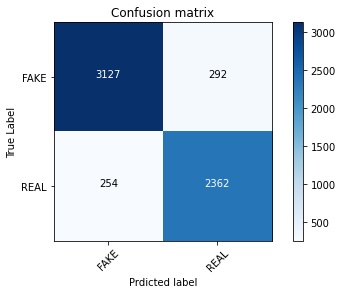

In [ ]:
print(confusion_matrix(y_test,y_pred1))

print('The accuracy score obtained from Bidirectional LSTM is : %.3f' %accuracy_score(y_test,y_pred1))

print("\nClassification Report")
print(classification_report(y_test,y_pred1))

print('Confusion Matrix created Bidirectionl LSTM')
cm_LSTM = metrics.confusion_matrix(y_test, y_pred1)
plot_confusion_matrix(cm_LSTM, classes = ['FAKE', 'REAL'])